In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<Axes: xlabel='target'>

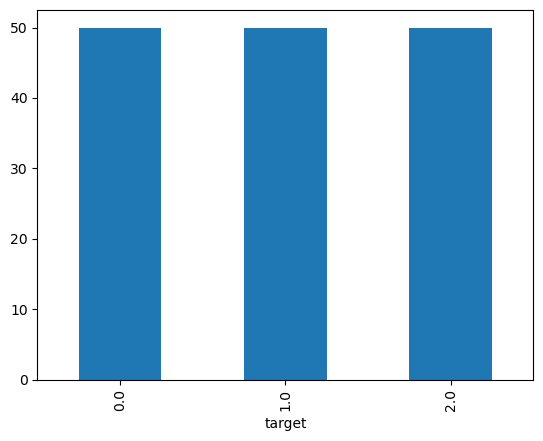

In [7]:
iris_df['target'].value_counts().plot(kind = 'bar')

In [8]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

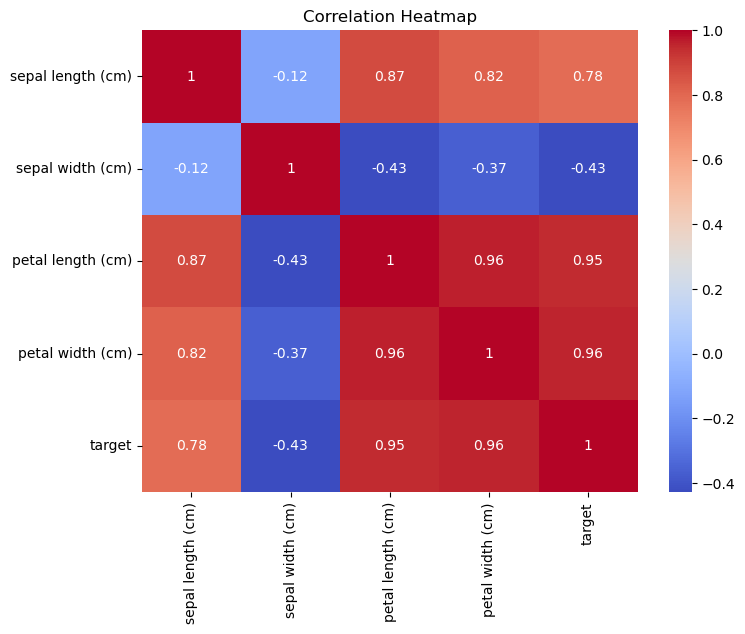

In [14]:
corr = iris_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

sns.pairplot(data=iris_df, hue='target', palette='viridis')
plt.title("Pairwise Relationships in the Iris Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

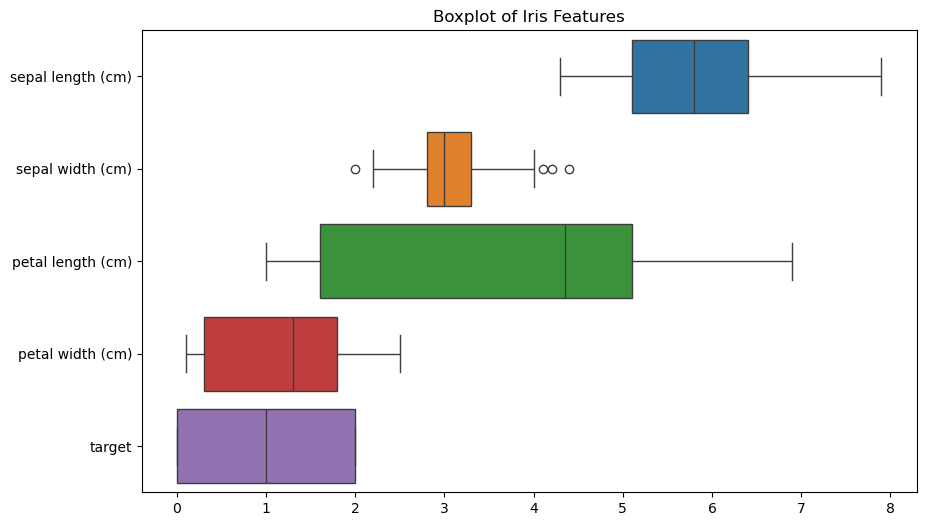

In [15]:
sns.boxplot(data=iris_df)
plt.title('Boxplot')
plt.show()

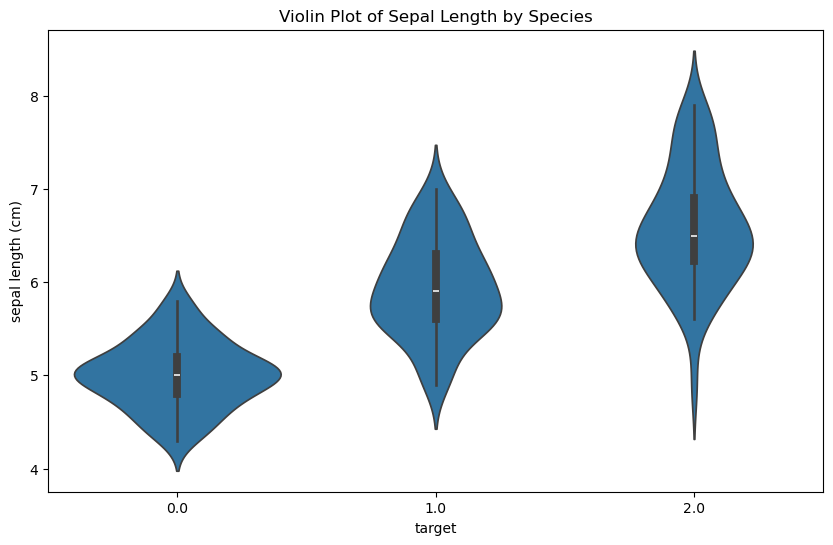

In [16]:
sns.violinplot(x='target', y='sepal length (cm)', data=iris_df)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

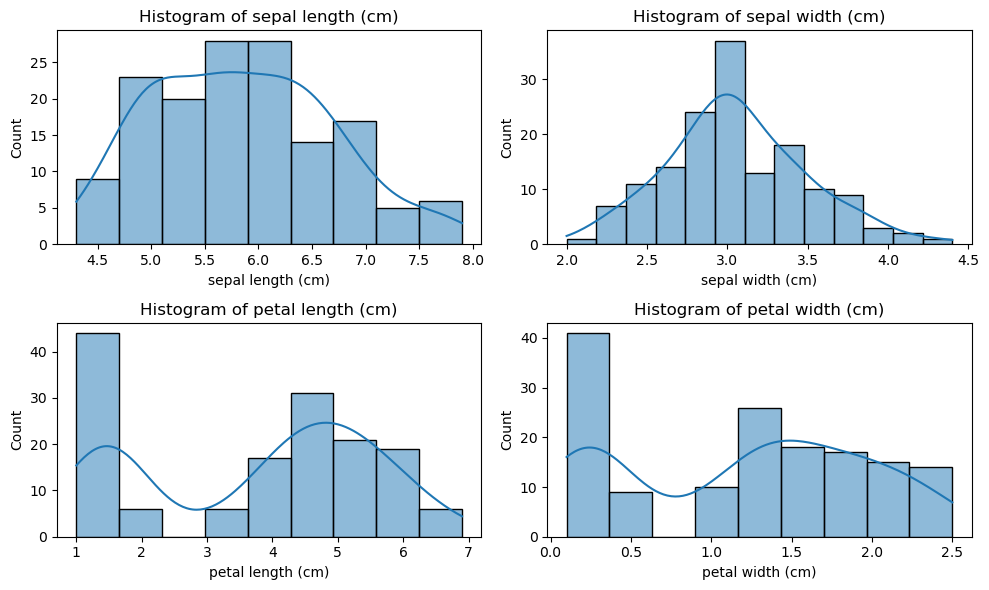

In [17]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris['feature_names']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(iris_df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

c:\Users\anura\anaconda3\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\anura\anaconda3\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\anura\anaconda3\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\anura\anaconda3\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\anura\anaconda3\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Users\anura\anaconda3\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserW

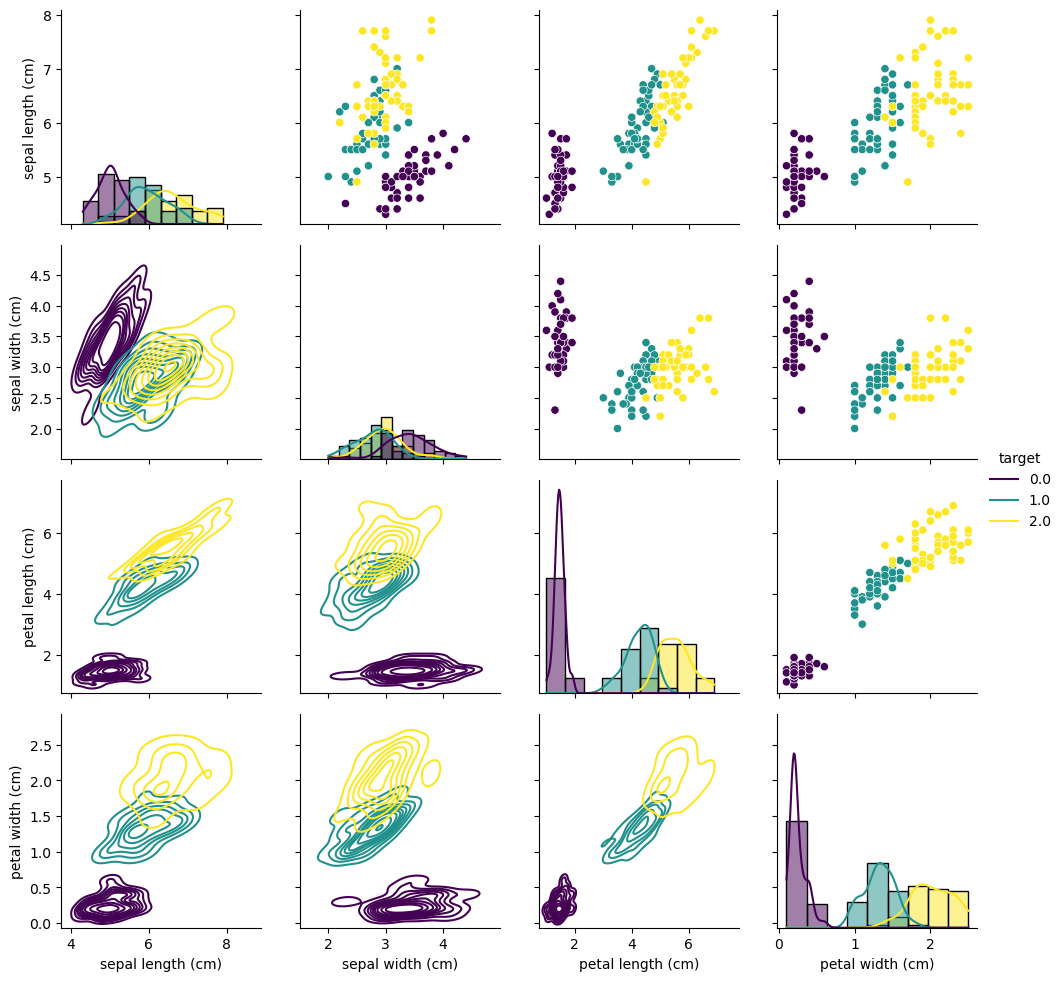

In [18]:
g = sns.PairGrid(iris_df, hue='target', palette='viridis')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.kdeplot, cmap='coolwarm')
g.add_legend()
plt.show()

In [19]:
X, y = iris.data, iris.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)
y_pred_logreg = lr_classifier.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Classifier Test Accuracy: {accuracy_logreg:.2f}')
print(classification_report(y_pred_logreg, y_test))

Logistic Regression Classifier Test Accuracy: 1.00
Training Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [44]:
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Support Vector Machine (SVM) Classifier Accuracy: {accuracy_svm:.2f}')
print(classification_report(y_pred_svm, y_test))


Support Vector Machine (SVM) Classifier Accuracy: 1.00
Training Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [46]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Classifier Accuracy: {accuracy_dt:.2f}')
print(classification_report(y_pred_dt, y_test))


Decision Tree Classifier Accuracy: 1.00
Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [54]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf:.2f}')
print(classification_report(y_pred_rf, y_test))


Random Forest Classifier Accuracy: 1.00
Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [94]:
classifiers = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto'],
            'degree': [2, 3, 4],
            'coef0': [0.0, 0.1, 0.5, 1.0]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

# Define K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True)

# Perform hyperparameter tuning for each classifier
for classifier_name, classifier_info in classifiers.items():
    print(f'Hyperparameter tuning for {classifier_name}:')
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=classifier_info['model'], param_grid=classifier_info['params'], cv=kf)
    grid_search.fit(X_train, y_train)
    
    # Retrieve best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Evaluate best model on test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Best Parameters:", best_params)
    print(f'Test Accuracy after GridSearchCV: {accuracy:.2f}')
    
    # Evaluate best model using cross-validation
    cv_accuracy = cross_val_score(best_model, X_test, y_test, cv=kf).mean()
    print(f'Cross-Validation Test Accuracy: {cv_accuracy:.2f}')
    
    print()

Hyperparameter tuning for Logistic Regression:
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Test Accuracy after GridSearchCV: 1.00
Cross-Validation Test Accuracy: 0.93

Hyperparameter tuning for K-Nearest Neighbors:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Test Accuracy after GridSearchCV: 1.00
Cross-Validation Test Accuracy: 0.93

Hyperparameter tuning for Support Vector Machine:
Best Parameters: {'C': 1, 'coef0': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Test Accuracy after GridSearchCV: 1.00
Cross-Validation Test Accuracy: 0.97

Hyperparameter tuning for AdaBoost:
Best Parameters: {'algorithm': 'SAMME', 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 100}
Test Accuracy after GridSearchCV: 1.00
Cross-Validation Test Accuracy: 0.93

Hyperparameter tuning for Decision Tree:
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy after GridSear